# Определение перспективного тарифа для телеком-компании

Я аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Описание тарифов:

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: минута разговора - 3 рубля, сообщение - 3 рубля, 1 Гб интернет-трафика - 200 рублей

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: минута разговора - 1 рубль, сообщение - 1 рубль, 1 Гб интернет-трафика - 150 рублей

# План работы


[**1. Осмотр и обработка данных**](#cell1)
- посмотрим наборы данных
- сделаем предварительные выводы
- поищем аномалии
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- привести данные к нужным типам


[**2. Подготовка данных**](#cell2)
Посчитайте для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)

[**3. Анализ данных**](#cell3)
- Опишите поведение клиентов оператора, исходя из выборки
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа
в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение
- Постройте гистограммы. Опишите распределения


[**4. Проверка гипотез**](#cell4)
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Пороговое значение alpha задайте самостоятельно.

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему

[**5. Результаты исследования**](#cell5)
- Общие выводы
- Рекомендации

<a id="cell1"></a>

## Осмотр и обработка данных  <a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy import stats as st

In [2]:
df_call = pd.read_csv('/datasets/calls.csv')
df_call

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
display(df_call.describe())
display(df_call.duplicated().sum()) # наличие дубликатов

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


0

In [5]:
df_int = pd.read_csv('/datasets/internet.csv', index_col=0)
df_int 

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [6]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
display(df_int.describe())
display(df_int.duplicated().sum()) # наличие дубликатов

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


0

,id
user_id,
1000,211
1001,96
1002,369
1003,104
1004,300
...,...
1495,254
1496,834
1497,121


array([[<AxesSubplot:title={'center':'id'}>]], dtype=object)

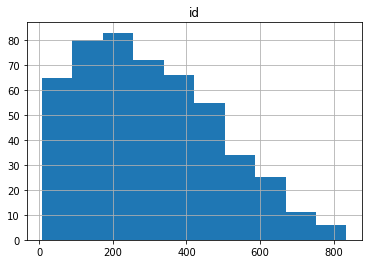

In [8]:
group = df_int.groupby(by = 'user_id').agg({'id':'count'})
display(group)
group.hist()

In [9]:
df_mess = pd.read_csv('/datasets/messages.csv')
df_mess

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [10]:
df_mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
display(df_mess.describe())
display(df_mess.duplicated().sum()) # наличие дубликатов

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


0

In [12]:
df_tarif = pd.read_csv('/datasets/tariffs.csv')
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
df_users = pd.read_csv('/datasets/users.csv')
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [14]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [15]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [16]:
display(df_users.describe())
display(df_users.duplicated().sum()) # наличие дубликатов

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


0

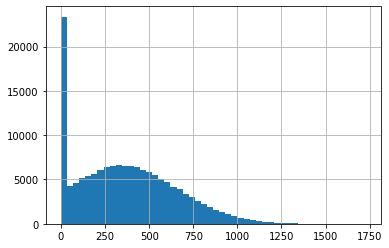

In [64]:
 df_int.mb_used.hist(bins = 50);

### Переходим к обработке данных

In [18]:
#проверяем таблицу df_call на наличие пропусков
df_call.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [19]:
#поменяем тип данных в столбце call_date на datetime и создадим новый столбец с месяцами
df_call['call_date'] = pd.to_datetime(df_call['call_date'], format='%Y-%m-%d')
df_call['month'] = pd.DatetimeIndex(df_call['call_date']).month

#так как оператор округляет минуты в большую сторону, то и мы приведем столбец duration к int
df_call['duration'] = np.ceil(df_call['duration']).astype('int')

df_call

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [20]:
#проверяем таблицу df_int на наличие пропусков
df_int.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [21]:
#поменяем тип данных в столбце session_date на datetime и создадим новый столбец с месяцами
df_int['session_date'] = pd.to_datetime(df_int['session_date'], format='%Y-%m-%d')
df_int['month'] = pd.DatetimeIndex(df_int['session_date']).month

df_int

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [22]:
#проверяем таблицу df_mess на наличие пропусков
df_mess.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [23]:
#поменяем тип данных в столбце message_date на datetime и создадим новый столбец с месяцами
df_mess['message_date'] = pd.to_datetime(df_mess['message_date'], format='%Y-%m-%d')
df_mess['month'] = pd.DatetimeIndex(df_mess['message_date']).month
df_mess

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [24]:
#проверяем таблицу df_users на наличие пропусков
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

462 пропуска в столбце churn_date, говорят о том что 38 клиентов прекратили пользоваться тарифом

In [25]:
#поменяем тип данных в столбце reg_date и churn_date на datetime, а также переименуем солбец tariff в tariff_name, как в таблице df_tarif
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format="%Y-%m-%d")
df_users.rename(columns = {'tariff': 'tariff_name'}, inplace=True)
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<a id="cell2"></a>

## Подготовка данных
Посчитаем для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)

### Количество сделанных звонков и израсходованных минут разговора по месяцам

Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам. Для этого сгруппируем данные по столбцам с id клиентов, месяцам и выведем сумму трафика и количество звонков. Сбросим индекс для новой таблицы и переименуем столбцы на более понятные.

In [26]:
user_calls = df_call.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index().rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})
user_calls

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


### Количество отправленных сообщений по месяцам 

Посчитаем количество отправленных сообщений по месяцам для каждого клиента. Для этого также сгруппируем данные по id клиента, месяцам и выведем количество сообщений. Сбросим индекс и переименуем столбцы.

In [27]:
user_message = df_mess.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns={'id':'message_total_in_month'})
user_message

,user_id,month,message_total_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


### Объем израсходованного интернет-трафика по месяцам

Посчитаем израсходованный трафик для каждого клиента по месяцам. Для этого также сгруппируем данные по id клиента, месяцам и выведем сумму потраченных мегабайтов. Округлим мегабайты в большую сторону, так как это делаем оператор. Сбросим индекс и переименуем столбцы. 

In [28]:
user_int = df_int.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index().rename(columns={'mb_used':'month_mb_used'})
user_int['month_mb_used'] = user_int['month_mb_used']/1024
user_int['month_mb_used'] = np.ceil(user_int['month_mb_used']).astype('int')

user_int

,user_id,month,month_mb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


In [29]:
#округлим тогда сразу и до гигабайт значения в таблице с описанием тарифов, так как в дальнейшем мы их будем сравнивать
#округляем в меньшую сторону так, как это описано в условии 15гб и 30гб
df_tarif['mb_per_month_included'] = df_tarif['mb_per_month_included']/1024
df_tarif['mb_per_month_included'] = np.floor(df_tarif['mb_per_month_included'])
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [66]:
# check
np.floor(1.5), np.floor(1.9)

(1.0, 1.0)

### Месячная выручка с каждого пользователя

Чтобы посчитать месячную выручку с каждого пользователя для начала нужно объединить все таблицы.

In [30]:
#добавим outer чтобы попали все данные и сбросим индекс чтобы не задвоились при дальнейшем объединении столбцы
df = user_calls.merge(user_message, on=['user_id','month'], how='outer').reset_index()
df = df.merge(user_int, on=['user_id','month'], how = 'outer').reset_index()
df.drop(['level_0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   3213 non-null   float64
 1   user_id                 3214 non-null   int64  
 2   month                   3214 non-null   int64  
 3   month_calls_duration    3174 non-null   float64
 4   calls_total_in_month    3174 non-null   float64
 5   message_total_in_month  2717 non-null   float64
 6   month_mb_used           3203 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 175.9 KB


In [31]:
#теперь добавим оставшиеся таблицы
df = df.merge(df_users, on='user_id', how='outer').reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   level_0                 3216 non-null   int64         
 1   index                   3213 non-null   float64       
 2   user_id                 3216 non-null   int64         
 3   month                   3214 non-null   float64       
 4   month_calls_duration    3174 non-null   float64       
 5   calls_total_in_month    3174 non-null   float64       
 6   message_total_in_month  2717 non-null   float64       
 7   month_mb_used           3203 non-null   float64       
 8   age                     3216 non-null   int64         
 9   churn_date              189 non-null    datetime64[ns]
 10  city                    3216 non-null   object        
 11  first_name              3216 non-null   object        
 12  last_name               3216 non-null   object  

In [32]:
df = df.merge(df_tarif, on='tariff_name', how='left')
#удалим столбец level_0, так как он дублирцет индексы
df.drop(['level_0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   3213 non-null   float64       
 1   user_id                 3216 non-null   int64         
 2   month                   3214 non-null   float64       
 3   month_calls_duration    3174 non-null   float64       
 4   calls_total_in_month    3174 non-null   float64       
 5   message_total_in_month  2717 non-null   float64       
 6   month_mb_used           3203 non-null   float64       
 7   age                     3216 non-null   int64         
 8   churn_date              189 non-null    datetime64[ns]
 9   city                    3216 non-null   object        
 10  first_name              3216 non-null   object        
 11  last_name               3216 non-null   object        
 12  reg_date                3216 non-null   datetime

In [33]:
#прежде чем подходить к расчету проверим наличие пропущенных значений
df.isna().sum()

index                        3
user_id                      0
month                        2
month_calls_duration        42
calls_total_in_month        42
message_total_in_month     499
month_mb_used               13
age                          0
churn_date                3027
city                         0
first_name                   0
last_name                    0
reg_date                     0
tariff_name                  0
messages_included            0
mb_per_month_included        0
minutes_included             0
rub_monthly_fee              0
rub_per_gb                   0
rub_per_message              0
rub_per_minute               0
dtype: int64

Лучше пропущенные значения в столбцах month_calls_duration, calls_total_in_month, message_total_in_month, month_mb_used заменить на 0, так как пропуски свидетельствуют об отсутсвии трафика, отправки сообщений и недозвонах.

In [34]:
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total_in_month'] = df['calls_total_in_month'].fillna(0)
df['message_total_in_month'] = df['message_total_in_month'].fillna(0)
df['month_mb_used'] = df['month_mb_used'].fillna(0)
df.isna().sum()

index                        3
user_id                      0
month                        2
month_calls_duration         0
calls_total_in_month         0
message_total_in_month       0
month_mb_used                0
age                          0
churn_date                3027
city                         0
first_name                   0
last_name                    0
reg_date                     0
tariff_name                  0
messages_included            0
mb_per_month_included        0
minutes_included             0
rub_monthly_fee              0
rub_per_gb                   0
rub_per_message              0
rub_per_minute               0
dtype: int64

In [35]:
df.duplicated().sum()

0

Общая таблица готова к подсчету выручки, для начала определим в рублях превышение по тарифу, для этого напишем функцию.

In [36]:
def tariff_excess(row):
    message = (row['message_total_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.floor((row['month_mb_used'] - row['mb_per_month_included']) * row['rub_per_gb'])
    total = 0
    for i in [message, mins, mbs]:
        if i > 0:
            total += i
    return total
df['tariff_excess'] = df.apply(lambda x: tariff_excess(x), axis=1)
df.sample(5)

,index,user_id,month,month_calls_duration,calls_total_in_month,message_total_in_month,month_mb_used,age,churn_date,city,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_excess
3076,3074.0,1481,9.0,312.0,43.0,22.0,17.0,70,NaT,Москва,...,2018-02-26,smart,50,15.0,500,550,200,3,3,400.0
1583,1583.0,1253,12.0,241.0,41.0,87.0,22.0,29,NaT,Астрахань,...,2018-08-06,ultra,1000,30.0,3000,1950,150,1,1,0.0
2458,2457.0,1390,7.0,2.0,1.0,1.0,3.0,56,NaT,Санкт-Петербург,...,2018-07-30,smart,50,15.0,500,550,200,3,3,0.0
2866,2865.0,1453,3.0,875.0,121.0,64.0,26.0,50,NaT,Москва,...,2018-01-01,ultra,1000,30.0,3000,1950,150,1,1,0.0
1390,1390.0,1220,12.0,766.0,102.0,0.0,21.0,59,NaT,Ростов-на-Дону,...,2018-11-22,smart,50,15.0,500,550,200,3,3,1998.0


In [37]:
# check
np.floor(1.9)

1.0

In [38]:
#теперь мы можем посчитать сколько всего платят с учетом абонентской платы и превышения
df['final_payment'] = df['rub_monthly_fee'] + df['tariff_excess']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   3213 non-null   float64       
 1   user_id                 3216 non-null   int64         
 2   month                   3214 non-null   float64       
 3   month_calls_duration    3216 non-null   float64       
 4   calls_total_in_month    3216 non-null   float64       
 5   message_total_in_month  3216 non-null   float64       
 6   month_mb_used           3216 non-null   float64       
 7   age                     3216 non-null   int64         
 8   churn_date              189 non-null    datetime64[ns]
 9   city                    3216 non-null   object        
 10  first_name              3216 non-null   object        
 11  last_name               3216 non-null   object        
 12  reg_date                3216 non-null   datetime

**Вывод по подготовке данных**. Мы обработали и получили все данные для дальнейшего анализа

In [67]:
# check
df['final_payment'].sum()

4916951.0

## Анализ данных

- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитайте среднее количество, дисперсию и стандартное отклонение
- Постройте гистограммы. Опишите распределения

### Сколько минут нужны клиентам тарифов СМАРТ и УЛЬТРА
Построим гистограмму и посчитаем среднее, медиану, дисперсию и стандартное отклонение.

In [40]:
df['month_calls_duration'].describe()

count    3216.000000
mean      450.964241
std       242.096312
min         0.000000
25%       282.000000
50%       443.000000
75%       589.000000
max      1673.000000
Name: month_calls_duration, dtype: float64

In [41]:
df['tariff_name'].value_counts()

smart    2230
ultra     986
Name: tariff_name, dtype: int64

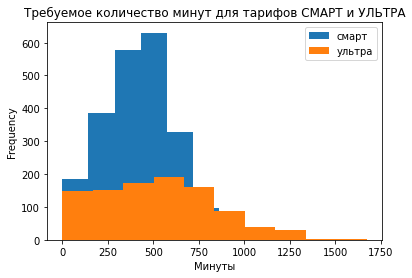

In [42]:
df[df['tariff_name'] == 'smart']['month_calls_duration'].plot(kind='hist', bins=10)
df[df['tariff_name'] == 'ultra']['month_calls_duration'].plot(kind='hist', bins=10)
plt.title('Требуемое количество минут для тарифов СМАРТ и УЛЬТРА')
plt.xlabel('Минуты')
plt.legend(['смарт', 'ультра'])

In [43]:
df.groupby('tariff_name').agg({'month_calls_duration':['median','mean','var','std']})

month_calls_duration                                       
                          median        mean            var         std
tariff_name                                                            
smart                      421.5  417.747534   36281.393836  190.476754
ultra                      518.0  526.089249  101052.493549  317.887549

**Вывод**. В среднем клиенты на тарифе Смарт тратят 418 минут - можно сказать что они практически полностью используют минуты тарифа. Клиенты на тарифе Ультра тратят в среднем 526 минут, в запасе у них остается около 2500 минут, входящих в их тариф. Среднее и медиана расположены рядом. 

### Сколько смс нужно клиентам тарифов СМАРТ и УЛЬТРА
Построим гистограмму и посчитаем среднее, медиану, дисперсию и стандартное отклонение.

In [44]:
df['message_total_in_month'].describe()

count    3216.000000
mean       38.257463
std        36.149684
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       224.000000
Name: message_total_in_month, dtype: float64

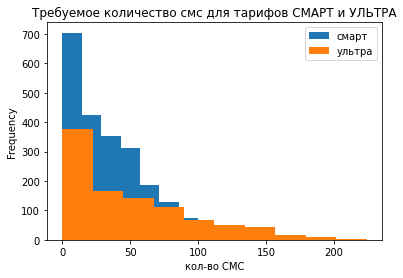

In [45]:
df[df['tariff_name'] == 'smart']['message_total_in_month'].plot(kind='hist', bins=10)
df[df['tariff_name'] == 'ultra']['message_total_in_month'].plot(kind='hist', bins=10)
plt.title('Требуемое количество смс для тарифов СМАРТ и УЛЬТРА')
plt.xlabel('кол-во СМС')
plt.legend(['смарт', 'ультра'])

In [46]:
df.groupby('tariff_name').agg({'message_total_in_month':['median','mean','var','std']})

message_total_in_month                                   
                            median       mean          var        std
tariff_name                                                          
smart                         28.0  33.369058   796.955256  28.230396
ultra                         38.0  49.313387  2285.417425  47.806040

**Вывод**. Смс сообщения пользуются меньшим спросом. В среднем у пользователей тарифа Ультра запас практически 950 неспользованных смс в месяц, у пользователей тарифа Спарт - около 17 сообщений. Медиана и средее снова рядом.

### Сколько трафика нужно клиентам тарифов СМАРТ и УЛЬТРА
Построим гистограмму и посчитаем среднее, медиану, дисперсию и стандартное отклонение.

In [47]:
df['month_mb_used'].describe()

count    3216.000000
mean       17.288246
std         7.410845
min         0.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        49.000000
Name: month_mb_used, dtype: float64

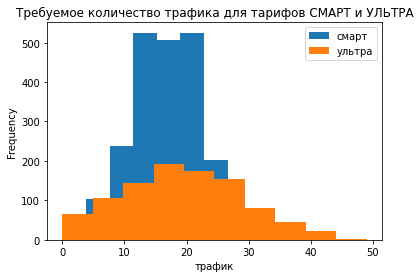

In [48]:
df[df['tariff_name'] == 'smart']['month_mb_used'].plot(kind='hist', bins=10)
df[df['tariff_name'] == 'ultra']['month_mb_used'].plot(kind='hist', bins=10)
plt.title('Требуемое количество трафика для тарифов СМАРТ и УЛЬТРА')
plt.xlabel('трафик')
plt.legend(['смарт', 'ультра'])

In [49]:
df.groupby('tariff_name').agg({'month_mb_used':['median','mean','var','std']})

month_mb_used                                
                   median       mean        var       std
tariff_name                                              
smart                17.0  16.321525  33.133453  5.756167
ultra                19.0  19.474645  97.378544  9.868057

**Вывод**. Среднее и медиана лежат снова рядом. Разброс данных больше у пользователей тарифа Ультра.  На Смарте люди выходят за пределы тарифа довольно часто, пользователи тарифа Ультра в среднем используют 19Гб, т.е. 10 Гб у них остается в запасе. 

**Общий вывод по анализу поведения клиентов оператора**. Пользователи тарифа Смарт в среднем полностью пользуются благами своего тарифа и чаще выходят за пределы тарифа. Пользователи тарифа Ультра пользуются только 1/6 частью минут, практически не используют смски и тратят 2/3 трафика. Тариф Ультра требует доработки.

<a id="cell4"></a>

## Проверка гипотез
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Пороговое значение alpha задайте самостоятельно.


Чтобы выбросы не мешали проверке гипотез напишем функцию, используем метод 3х сигм, для удаления выбросов.

In [50]:
def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.
Гипотеза о равенстве средних двух генеральных совокупностей №1

**Сформулируем гипотезы:**

- H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
- H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [51]:
ultra = df[df['tariff_name'] == 'ultra']
smart = df[df['tariff_name'] == 'smart']

In [52]:
ultra = delete_outliers(ultra, 'final_payment', 0)
ultra = ultra['final_payment']

In [53]:
smart = delete_outliers(smart, 'final_payment', 0)
smart = smart['final_payment']

In [54]:
alpha = 0.05
results = st.ttest_ind(ultra, smart)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.1080242236586082e-155
Отвергаем нулевую гипотезу


**Вывод**. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Гипотеза о равенстве средних двух генеральных совокупностей №2

**Сформулируем гипотезы:**

- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [55]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [56]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Другой регион')
df.head()

,index,user_id,month,month_calls_duration,calls_total_in_month,message_total_in_month,month_mb_used,age,churn_date,city,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_excess,final_payment,region
0,0.0,1000,5.0,159.0,22.0,22.0,3.0,52,NaT,Краснодар,...,1000,30.0,3000,1950,150,1,1,0.0,1950.0,Другой регион
1,1.0,1000,6.0,172.0,43.0,60.0,23.0,52,NaT,Краснодар,...,1000,30.0,3000,1950,150,1,1,0.0,1950.0,Другой регион
2,2.0,1000,7.0,340.0,47.0,75.0,14.0,52,NaT,Краснодар,...,1000,30.0,3000,1950,150,1,1,0.0,1950.0,Другой регион
3,3.0,1000,8.0,408.0,52.0,81.0,14.0,52,NaT,Краснодар,...,1000,30.0,3000,1950,150,1,1,0.0,1950.0,Другой регион
4,4.0,1000,9.0,466.0,58.0,57.0,15.0,52,NaT,Краснодар,...,1000,30.0,3000,1950,150,1,1,0.0,1950.0,Другой регион


In [57]:
moscow = df[df['region'] == 'Москва']
region = df[df['region'] == 'Другой регион']

In [58]:
moscow = delete_outliers(moscow, 'final_payment', 0)
moscow = moscow['final_payment']

In [59]:
region = delete_outliers(region, 'final_payment', 0)
region = region['final_payment']

In [60]:
results = st.ttest_ind(moscow, region)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.29144177734462323
Не получилось отвергнуть нулевую гипотезу


**Вывод**. Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов и это можно утвержать с вероятностью в 30%.

<a id="cell5"></a>

In [68]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


## Результаты исследования
Люди на разных тарифах ведут себя по-разному. Рано или поздно даже клиенты на тарифе Ультра могут уйти, так что рекомендую пересмотреть пакеты тарифов.

СМС-ки у клиентов в тарифе Ультра практически не расходуются, тариф Смарт подходит к лимитам - рекомендую пересмотреть пакеты смс сообщений в тарифе Ультра - возможно вообще избавиться. 

Мобильная связь тоже расходуется по разному. В среднем клиенты на тарифе Смарт тратят 418 минут - можно сказать что они практически полностью используют минуты тарифа. Клиенты на тарифе Ультра тратят в среднем 526 минут, в запасе у них остается около 2500 минут, входящих в их тариф. Рекомендую пересмотреть пакет минут в Тарифе Ультра - значительно сократить и отрегулировать стоимость тарифа из-за этих изменений.

Трафик тоже по разному расходуется. На Смарте люди выходят за пределы тарифа довольно часто, пользователи тарифа Ультра в среднем используют 19Гб, т.е. 10 Гб у них остается в запасе. Рекомендую пересмотреть пакет мегабайтов в тарифе Смарт, возможно за счет сокращения смс пакета.

Выручка одинаковая и в регионах, и в Москве. Вероятно это не связано с уровнем жизни, а вызвана обыденностью потребления телефонной связи и интернета.